In [68]:
## Import Essential Data handling libraries
import pandas as pd
import numpy as np

from math import floor
from time import perf_counter

import matplotlib.pyplot as plt,seaborn as sns
import matplotlib as mpl
%matplotlib inline


from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE

In [69]:
### Importing Machine Learning Libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.metrics import precision_recall_curve, auc, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# from xgboost import XGBClassifier

# import lightgbm as lgb

# from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFECV

In [70]:
# from functools import partial
# from skopt import space
# from skopt import gp_minimize

# from hyperopt import hp, fmin, tpe, Trials
# from hyperopt.pyll.base import scope


# import optuna

#### Loading Data

In [71]:
df_raw = pd.read_csv("..\data\creditcard.csv")

In [72]:
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [73]:
df_raw.drop(["Time"], axis = 1, inplace  = True)

##### Checking Class Distribution

In [74]:
print(df_raw.Class.value_counts())

print("\n","% distribution\n",df_raw.Class.value_counts(True)*100)

0    284315
1       492
Name: Class, dtype: int64

 % distribution
 0   99.827
1    0.173
Name: Class, dtype: float64


In [75]:
df_raw.shape

(284807, 30)

#### Scoring function

In [76]:
def AUPRC(y_true, y_pred_proba) :
    precision, recall, thresholds = precision_recall_curve(y_true = y_true, probas_pred= y_pred_proba)
    auprc = auc(recall, precision)
    return(np.round(auprc, 4))

#### Data Transformation
* 1. Quantile Transformation (normal distribution)
* 2. standard scaling the data

In [77]:
quantile_transformer = QuantileTransformer(output_distribution="normal")
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [78]:
df_transformed = df_raw.copy()

for i in range(df_transformed.iloc[:,:-1].shape[1]):
    qt_transformed_var = quantile_transformer.fit_transform(df_transformed.iloc[:,i].values.reshape(-1,1))[:,0]
#     qt_transformed_std_scaled = standard_scaler.fit_transform(qt_transformed_var.reshape(-1,1))[:,0]
    qt_transformed_std_scaled = min_max_scaler.fit_transform(qt_transformed_var.reshape(-1,1))[:,0]
    
    df_transformed.iloc[:,i] = qt_transformed_std_scaled

In [79]:
df_transformed.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.404,0.485,0.704,0.616,0.471,0.569,0.527,0.519,0.542,0.529,0.455,0.415,0.404,0.449,0.671,0.434,0.539,0.504,0.558,0.593,0.503,0.534,0.456,0.507,0.519,0.470,0.580,0.469,0.604,0
1,0.544,0.521,0.498,0.541,0.512,0.521,0.484,0.515,0.476,0.489,0.659,0.631,0.549,0.472,0.564,0.556,0.494,0.476,0.479,0.497,0.437,0.420,0.547,0.438,0.526,0.537,0.491,0.505,0.413,0
2,0.404,0.378,0.633,0.534,0.454,0.631,0.592,0.551,0.360,0.543,0.554,0.490,0.570,0.469,0.767,0.245,0.643,0.485,0.262,0.633,0.586,0.599,0.694,0.393,0.433,0.482,0.449,0.427,0.661,0
3,0.431,0.473,0.634,0.434,0.504,0.613,0.527,0.572,0.370,0.506,0.483,0.504,0.551,0.453,0.431,0.377,0.400,0.713,0.354,0.437,0.475,0.500,0.424,0.339,0.634,0.463,0.550,0.555,0.593,0
4,0.417,0.573,0.611,0.536,0.464,0.539,0.567,0.418,0.583,0.591,0.429,0.553,0.633,0.367,0.514,0.436,0.476,0.496,0.606,0.619,0.506,0.603,0.445,0.521,0.461,0.599,0.603,0.640,0.560,0


In [80]:
#selected vars (manual feature selection)
all_vars = list(set(list(df_transformed.columns)) - set(["V8","V13","V15", "V19", "V20", "V22", "V23","V24", "V25", "V26", "Amount"]))
 
df = df_transformed[all_vars]

In [81]:
df.head()

,Class,V27,V17,V18,V4,V14,V16,V12,V7,V1,V9,V3,V11,V6,V21,V10,V28,V2,V5
0,0,0.580,0.539,0.504,0.616,0.449,0.434,0.415,0.527,0.404,0.542,0.704,0.455,0.569,0.503,0.529,0.469,0.485,0.471
1,0,0.491,0.494,0.476,0.541,0.472,0.556,0.631,0.484,0.544,0.476,0.498,0.659,0.521,0.437,0.489,0.505,0.521,0.512
2,0,0.449,0.643,0.485,0.534,0.469,0.245,0.490,0.592,0.404,0.360,0.633,0.554,0.631,0.586,0.543,0.427,0.378,0.454
3,0,0.550,0.400,0.713,0.434,0.453,0.377,0.504,0.527,0.431,0.370,0.634,0.483,0.613,0.475,0.506,0.555,0.473,0.504
4,0,0.603,0.476,0.496,0.536,0.367,0.436,0.553,0.567,0.417,0.583,0.611,0.429,0.539,0.506,0.591,0.640,0.573,0.464


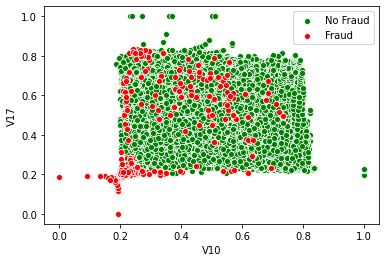

In [82]:
sns.scatterplot(df[df.Class==0]["V10"],df[df.Class==0]["V17"],
                color="g", label = "No Fraud")
sns.scatterplot(df[df.Class==1]["V10"],df[df.Class==1]["V17"],
                color="r", label = "Fraud")

##### Vizualizing full data in 2-Dimension using T-SNE

In [83]:
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(df.drop("Class", axis =1))

In [84]:
# df_subset["y"] = df.Class.values
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
# plt.figure(figsize=(5,3))
# sns.scatterplot(
#     x="tsne_feature_1", y="tsne_feature_2",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )

In [85]:
# plt.scatter(df["V10"], df["V17"])
# plt.xlabel("Feature 10")
# plt.ylabel("Feature 17")
# plt.show()

#### Splitting Train and Test Data

In [86]:
def create_stratified_folds(data, k_fold_num, target_variable):
    np.random.seed(7)
    data["kfold"] = -1 # we create a new column called kfold and fill it with -1
    data = data.sample(frac=1).reset_index(drop=True) # the next step is to randomize the rows of the data

    y = data[target_variable].values

    kf = model_selection.StratifiedKFold(n_splits= k_fold_num)

    for fold, (trn_, partitioned_idx_) in enumerate(kf.split(X=data, y = y)):
        data.loc[partitioned_idx_, 'kfold'] = fold
    return(data)

In [87]:
k_fold_num = 5

df = create_stratified_folds(df, k_fold_num = 5, target_variable = "Class")

features = [f for f in df.columns if f not in ["kfold","Class"]]

In [88]:
df.groupby("kfold")["Class"].value_counts(True) ### For each fold the distribution of target variable looks good

kfold  Class
0      0       0.998
       1       0.002
1      0       0.998
       1       0.002
2      0       0.998
       1       0.002
3      0       0.998
       1       0.002
4      0       0.998
       1       0.002
Name: Class, dtype: float64

In [89]:
df.head()

,Class,V27,V17,V18,V4,V14,V16,V12,V7,V1,V9,V3,V11,V6,V21,V10,V28,V2,V5,kfold
0,0,0.407,0.522,0.466,0.508,0.433,0.553,0.580,0.571,0.430,0.438,0.547,0.492,0.418,0.449,0.428,0.524,0.639,0.467,0
1,0,0.419,0.416,0.509,0.472,0.585,0.586,0.657,0.479,0.412,0.401,0.503,0.520,0.579,0.470,0.431,0.437,0.639,0.534,0
2,0,0.688,0.547,0.687,0.723,0.616,0.580,0.270,0.436,0.406,0.563,0.756,0.644,0.634,0.476,0.705,0.600,0.641,0.490,0
3,0,0.536,0.522,0.387,0.610,0.521,0.443,0.523,0.491,0.538,0.533,0.527,0.467,0.507,0.451,0.501,0.517,0.516,0.480,0
4,0,0.561,0.388,0.687,0.523,0.447,0.406,0.496,0.411,0.566,0.431,0.544,0.383,0.530,0.373,0.589,0.540,0.456,0.420,0


In [90]:
print(features)

['V27', 'V17', 'V18', 'V4', 'V14', 'V16', 'V12', 'V7', 'V1', 'V9', 'V3', 'V11', 'V6', 'V21', 'V10', 'V28', 'V2', 'V5']


In [91]:
#### Considering Fold #5 to be test data, and rest train data
X_train = df[df.kfold!=4][features].values
y_train = df[df.kfold!=4]["Class"].values

X_test = df[df.kfold==4][features].values
y_test = df[df.kfold==4]["Class"].values

In [92]:
print("Training data Shape...")
print(X_train.shape)
print(y_train.shape)

print("\nTest data Shape....")
print(X_test.shape)
print(y_test.shape)

Training data Shape...
(227846, 18)
(227846,)

Test data Shape....
(56961, 18)
(56961,)


In [93]:
print("Training data Class distribution...")
print(y_train.mean())

print("\nTest data Class distribution...")
print(y_test.mean())

Training data Class distribution...
0.0017292381696408978

Test data Class distribution...
0.0017204754130018785


##### Performing supervised and unsupervised classification and comparing results

### 1. Supervised Classification 

##### Extra Tree Classifier (Amongst Best performing classifier for this dataset)

In [94]:
model = ExtraTreesClassifier( n_jobs = -1)
model

ExtraTreesClassifier(n_jobs=-1)

In [95]:
model.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [96]:
y_pred = model.predict(X_test)

In [97]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [98]:
print(roc_auc_score(y_test, y_pred_proba))

0.9630320745852815


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961



In [100]:
cf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
df_cm
## Columns == Predicted
##  Index == Actual

,0,1
0,56860,3
1,21,77


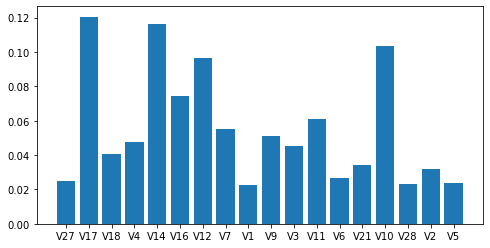

In [101]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.bar(features,model.feature_importances_)

mpl.rcParams.update(mpl.rcParamsDefault)

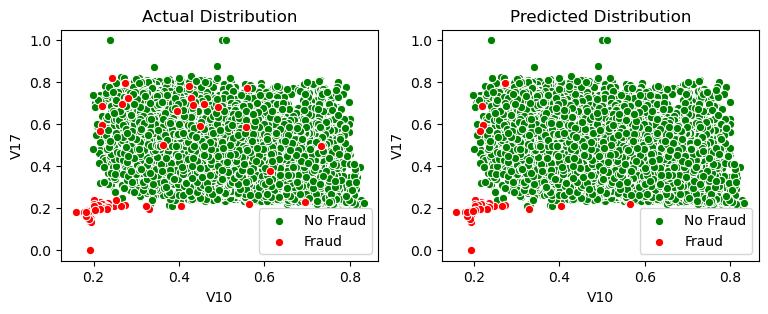

In [102]:
X_test_df = pd.DataFrame(X_test, columns=features)
X_test_df["Class"] = y_test

X_test_df["Predicted_Class"] = y_pred

plt.rcParams["figure.figsize"] = [9, 3]
fig, axs = plt.subplots(ncols = 2, nrows = 1)


axs[0].set_title("Actual Distribution")
sns.scatterplot(X_test_df[X_test_df.Class==0]["V10"],X_test_df[X_test_df.Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[0])
sns.scatterplot(X_test_df[X_test_df.Class==1]["V10"],X_test_df[X_test_df.Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[0])

axs[1].set_title("Predicted Distribution")
sns.scatterplot(X_test_df[X_test_df.Predicted_Class==0]["V10"],X_test_df[X_test_df.Predicted_Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[1])
sns.scatterplot(X_test_df[X_test_df.Predicted_Class==1]["V10"],X_test_df[X_test_df.Predicted_Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[1])

mpl.rcParams.update(mpl.rcParamsDefault)

### 2. Unsupervised Classification

In [103]:
from sklearn.cluster import KMeans

##### 1. K-means

In [104]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
print(df_cm)
## Columns == Predicted
##  Index == Actual

              precision    recall  f1-score   support

           0       1.00      0.48      0.65     56863
           1       0.00      0.94      0.01        98

    accuracy                           0.48     56961
   macro avg       0.50      0.71      0.33     56961
weighted avg       1.00      0.48      0.65     56961

       0      1
0  27286  29577
1      6     92


In [106]:
print("Recall is good, but Precision is very POOR.")

Recall is good, but Precision is very POOR.


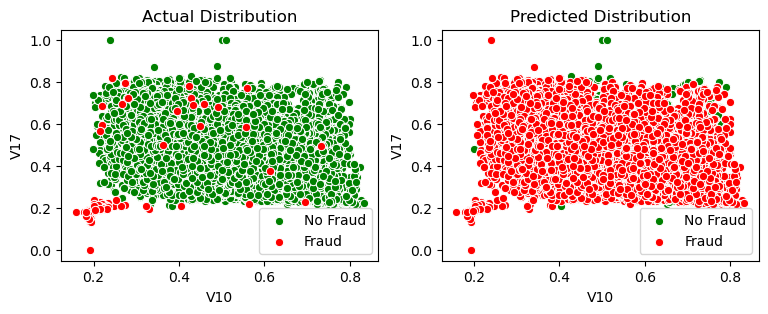

In [107]:
X_test_df = pd.DataFrame(X_test, columns=features)
X_test_df["Class"] = y_test

X_test_df["Predicted_Class"] = y_pred

plt.rcParams["figure.figsize"] = [9, 3]
fig, axs = plt.subplots(ncols = 2, nrows = 1)


axs[0].set_title("Actual Distribution")
sns.scatterplot(X_test_df[X_test_df.Class==0]["V10"],X_test_df[X_test_df.Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[0])
sns.scatterplot(X_test_df[X_test_df.Class==1]["V10"],X_test_df[X_test_df.Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[0])

axs[1].set_title("Predicted Distribution")
sns.scatterplot(X_test_df[X_test_df.Predicted_Class==0]["V10"],X_test_df[X_test_df.Predicted_Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[1])
sns.scatterplot(X_test_df[X_test_df.Predicted_Class==1]["V10"],X_test_df[X_test_df.Predicted_Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[1])

mpl.rcParams.update(mpl.rcParamsDefault)

In [108]:
X_train_df = pd.DataFrame(X_train, columns=features)
X_train_df["Class"] = y_train

##### 2. DBSCAN

In [109]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.123, min_samples = 2)

# clusters = dbscan.fit_predict(X_train)

# pd.Series(clusters).value_counts()

# # plot the cluster assignments
# plt.scatter(X_train_df["V10"], X_train_df["V17"], c=clusters, cmap="plasma")
# plt.xlabel("Feature V10")
# plt.ylabel("Feature V17")

##### 3. LOF

In [110]:
from sklearn.neighbors import LocalOutlierFactor

In [111]:
# X_train = X_train_df[["V10", "V17", "V14"]].values

In [112]:
# lof = LocalOutlierFactor(n_neighbors=20, contamination=.0017, n_jobs = -1)

lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30,n_jobs = -1,metric='minkowski', p=2, metric_params=None, contamination=.0017)

In [113]:
lof_pred = lof.fit_predict(X_train)

In [114]:
sum(lof_pred==-1)

388

In [115]:
X_train_df.head()

,V27,V17,V18,V4,V14,V16,V12,V7,V1,V9,V3,V11,V6,V21,V10,V28,V2,V5,Class
0,0.407,0.522,0.466,0.508,0.433,0.553,0.580,0.571,0.430,0.438,0.547,0.492,0.418,0.449,0.428,0.524,0.639,0.467,0
1,0.419,0.416,0.509,0.472,0.585,0.586,0.657,0.479,0.412,0.401,0.503,0.520,0.579,0.470,0.431,0.437,0.639,0.534,0
2,0.688,0.547,0.687,0.723,0.616,0.580,0.270,0.436,0.406,0.563,0.756,0.644,0.634,0.476,0.705,0.600,0.641,0.490,0
3,0.536,0.522,0.387,0.610,0.521,0.443,0.523,0.491,0.538,0.533,0.527,0.467,0.507,0.451,0.501,0.517,0.516,0.480,0
4,0.561,0.388,0.687,0.523,0.447,0.406,0.496,0.411,0.566,0.431,0.544,0.383,0.530,0.373,0.589,0.540,0.456,0.420,0


In [116]:
lof_index=np.where(lof_pred==-1) ## outlier point indices

In [117]:
X_train_df["LOF_outlier"] = 0

In [118]:
X_train_df.loc[list(lof_index[0]), "LOF_outlier"] = 1

In [119]:
X_train_df.head()

,V27,V17,V18,V4,V14,V16,V12,V7,V1,V9,V3,V11,V6,V21,V10,V28,V2,V5,Class,LOF_outlier
0,0.407,0.522,0.466,0.508,0.433,0.553,0.580,0.571,0.430,0.438,0.547,0.492,0.418,0.449,0.428,0.524,0.639,0.467,0,0
1,0.419,0.416,0.509,0.472,0.585,0.586,0.657,0.479,0.412,0.401,0.503,0.520,0.579,0.470,0.431,0.437,0.639,0.534,0,0
2,0.688,0.547,0.687,0.723,0.616,0.580,0.270,0.436,0.406,0.563,0.756,0.644,0.634,0.476,0.705,0.600,0.641,0.490,0,0
3,0.536,0.522,0.387,0.610,0.521,0.443,0.523,0.491,0.538,0.533,0.527,0.467,0.507,0.451,0.501,0.517,0.516,0.480,0,0
4,0.561,0.388,0.687,0.523,0.447,0.406,0.496,0.411,0.566,0.431,0.544,0.383,0.530,0.373,0.589,0.540,0.456,0.420,0,0


In [120]:
X_train_df.LOF_outlier.value_counts()

0    227458
1       388
Name: LOF_outlier, dtype: int64

In [121]:
X_train_df.Class.value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [122]:
print(classification_report(X_train_df.Class.values, X_train_df.LOF_outlier.values))

cf_matrix = confusion_matrix(X_train_df.Class.values, X_train_df.LOF_outlier.values)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
print(df_cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227846
   macro avg       0.50      0.50      0.50    227846
weighted avg       1.00      1.00      1.00    227846

        0    1
0  227064  388
1     394    0


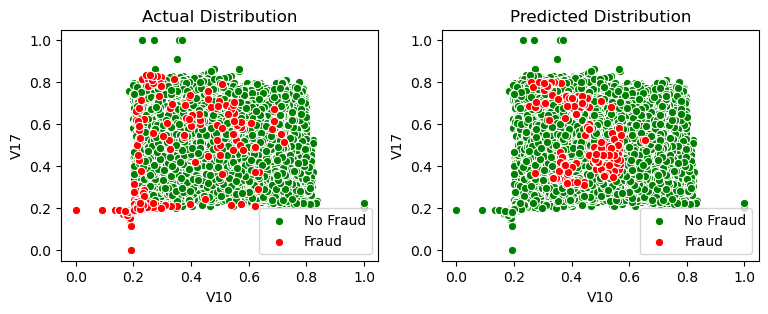

In [123]:
plt.rcParams["figure.figsize"] = [9, 3]
fig, axs = plt.subplots(ncols = 2, nrows = 1)


axs[0].set_title("Actual Distribution")
sns.scatterplot(X_train_df[X_train_df.Class==0]["V10"],X_train_df[X_train_df.Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[0])
sns.scatterplot(X_train_df[X_train_df.Class==1]["V10"],X_train_df[X_train_df.Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[0])

axs[1].set_title("Predicted Distribution")
sns.scatterplot(X_train_df[X_train_df.LOF_outlier==0]["V10"],X_train_df[X_train_df.LOF_outlier==0]["V17"],
                color="g", label = "No Fraud", ax = axs[1])
sns.scatterplot(X_train_df[X_train_df.LOF_outlier==1]["V10"],X_train_df[X_train_df.LOF_outlier==1]["V17"],
                color="r", label = "Fraud", ax = axs[1])

mpl.rcParams.update(mpl.rcParamsDefault)

In [124]:
print(df_cm)

        0    1
0  227064  388
1     394    0


##### 4. Isolation Forest

In [125]:
from sklearn.ensemble import IsolationForest

In [126]:
if_model=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0017,
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour="new")

In [127]:
if_model.fit(X_train)

IsolationForest(behaviour='new', contamination=0.0017, n_jobs=-1,
                random_state=42)

#### testing on training data

In [128]:
if_pred_train = if_model.predict(X_train)

In [129]:
if_index=np.where(if_pred_train==-1)
X_train_df["IF_outlier"] = 0

X_train_df.loc[list(if_index[0]), "IF_outlier"] = 1

X_train_df.IF_outlier.value_counts()

0    227458
1       388
Name: IF_outlier, dtype: int64

In [130]:
X_train_df.head()

,V27,V17,V18,V4,V14,V16,V12,V7,V1,V9,V3,V11,V6,V21,V10,V28,V2,V5,Class,LOF_outlier,IF_outlier
0,0.407,0.522,0.466,0.508,0.433,0.553,0.580,0.571,0.430,0.438,0.547,0.492,0.418,0.449,0.428,0.524,0.639,0.467,0,0,0
1,0.419,0.416,0.509,0.472,0.585,0.586,0.657,0.479,0.412,0.401,0.503,0.520,0.579,0.470,0.431,0.437,0.639,0.534,0,0,0
2,0.688,0.547,0.687,0.723,0.616,0.580,0.270,0.436,0.406,0.563,0.756,0.644,0.634,0.476,0.705,0.600,0.641,0.490,0,0,0
3,0.536,0.522,0.387,0.610,0.521,0.443,0.523,0.491,0.538,0.533,0.527,0.467,0.507,0.451,0.501,0.517,0.516,0.480,0,0,0
4,0.561,0.388,0.687,0.523,0.447,0.406,0.496,0.411,0.566,0.431,0.544,0.383,0.530,0.373,0.589,0.540,0.456,0.420,0,0,0


In [131]:
print(classification_report(X_train_df.Class.values, X_train_df.IF_outlier.values))

cf_matrix = confusion_matrix(X_train_df.Class.values, X_train_df.IF_outlier.values)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
print(df_cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.38      0.38      0.38       394

    accuracy                           1.00    227846
   macro avg       0.69      0.69      0.69    227846
weighted avg       1.00      1.00      1.00    227846

        0    1
0  227213  239
1     245  149


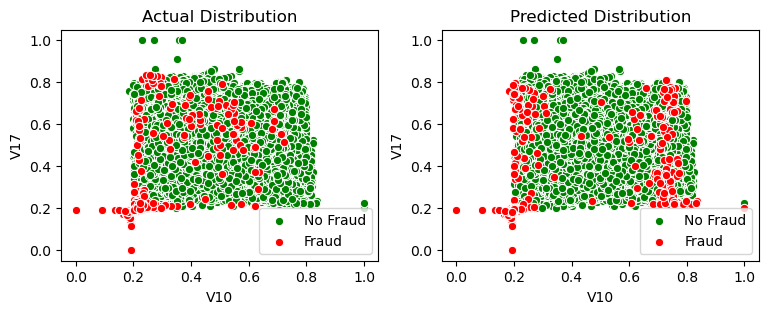

In [132]:
plt.rcParams["figure.figsize"] = [9, 3]
fig, axs = plt.subplots(ncols = 2, nrows = 1)


axs[0].set_title("Actual Distribution")
sns.scatterplot(X_train_df[X_train_df.Class==0]["V10"],X_train_df[X_train_df.Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[0])
sns.scatterplot(X_train_df[X_train_df.Class==1]["V10"],X_train_df[X_train_df.Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[0])

axs[1].set_title("Predicted Distribution")
sns.scatterplot(X_train_df[X_train_df.IF_outlier==0]["V10"],X_train_df[X_train_df.IF_outlier==0]["V17"],
                color="g", label = "No Fraud", ax = axs[1])
sns.scatterplot(X_train_df[X_train_df.IF_outlier==1]["V10"],X_train_df[X_train_df.IF_outlier==1]["V17"],
                color="r", label = "Fraud", ax = axs[1])

mpl.rcParams.update(mpl.rcParamsDefault)

### PyOD detectors

In [134]:
outlier_fraction = 0.0017

In [135]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
# from pyod.models.iforest import IForest

##### 1.  ABOD

In [138]:
# out_model = ABOD(contamination=outlier_fraction)
# out_model.fit(X_test)

# # scores_pred = out_model.decision_function(X_test) * -1

# # scores_pred

# y_pred = out_model.predict(X_test)

# print(np.unique(y_pred))
# print(np.mean(y_pred))

ABOD(contamination=0.0017, method='fast', n_neighbors=5)

##### 2. CBLOF

In [154]:
out_model = CBLOF(contamination=outlier_fraction, check_estimator=False)
out_model.fit(X_train)

# scores_pred = out_model.decision_function(X_test) * -1

# scores_pred

y_pred = out_model.predict(X_train)

print(np.unique(y_pred))
print(np.mean(y_pred))

print(classification_report(y_train, y_pred))



[0 1]
0.0017029045934534729
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.40      0.40      0.40       394

    accuracy                           1.00    227846
   macro avg       0.70      0.70      0.70    227846
weighted avg       1.00      1.00      1.00    227846



In [159]:
cblof_index=np.where(y_pred==1) ## outlier point indices

In [160]:
X_train_df["LOF_outlier"] = 0

In [162]:
X_train_df.loc[list(cblof_index[0]), "LOF_outlier"] = 1

In [163]:
X_train_df.LOF_outlier.value_counts()

0    227458
1       388
Name: LOF_outlier, dtype: int64

In [164]:
print(classification_report(X_train_df.Class.values, X_train_df.LOF_outlier.values))

cf_matrix = confusion_matrix(X_train_df.Class.values, X_train_df.LOF_outlier.values)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in [0,1]], columns=[i for i in [0,1]])
print(df_cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.40      0.40      0.40       394

    accuracy                           1.00    227846
   macro avg       0.70      0.70      0.70    227846
weighted avg       1.00      1.00      1.00    227846

        0    1
0  227220  232
1     238  156


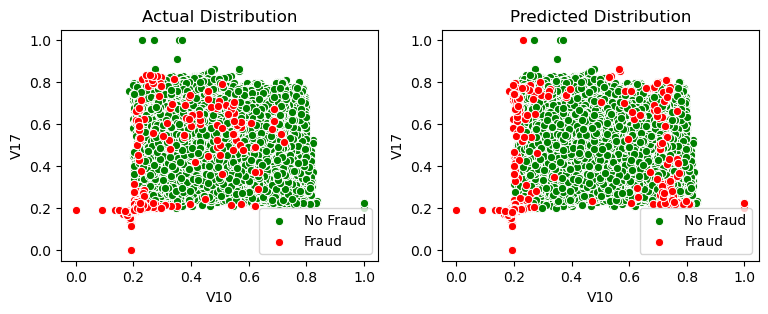

In [165]:
plt.rcParams["figure.figsize"] = [9, 3]
fig, axs = plt.subplots(ncols = 2, nrows = 1)


axs[0].set_title("Actual Distribution")
sns.scatterplot(X_train_df[X_train_df.Class==0]["V10"],X_train_df[X_train_df.Class==0]["V17"],
                color="g", label = "No Fraud", ax = axs[0])
sns.scatterplot(X_train_df[X_train_df.Class==1]["V10"],X_train_df[X_train_df.Class==1]["V17"],
                color="r", label = "Fraud", ax = axs[0])

axs[1].set_title("Predicted Distribution")
sns.scatterplot(X_train_df[X_train_df.LOF_outlier==0]["V10"],X_train_df[X_train_df.LOF_outlier==0]["V17"],
                color="g", label = "No Fraud", ax = axs[1])
sns.scatterplot(X_train_df[X_train_df.LOF_outlier==1]["V10"],X_train_df[X_train_df.LOF_outlier==1]["V17"],
                color="r", label = "Fraud", ax = axs[1])

mpl.rcParams.update(mpl.rcParamsDefault)

##### 3. KNN

In [150]:
out_model = KNN(contamination=outlier_fraction, n_neighbors=11)
out_model.fit(X_test)

# scores_pred = out_model.decision_function(X_test) * -1

# scores_pred

y_pred = out_model.predict(X_test)

print(np.unique(y_pred))
print(np.mean(y_pred))

[0 1]
0.001544916697389442


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.26      0.23      0.25        98

    accuracy                           1.00     56961
   macro avg       0.63      0.62      0.62     56961
weighted avg       1.00      1.00      1.00     56961



##### 4. HBOS

In [153]:
out_model = HBOS(contamination=outlier_fraction)
out_model.fit(X_test)

# scores_pred = out_model.decision_function(X_test) * -1

# scores_pred

y_pred = out_model.predict(X_test)

print(np.unique(y_pred))
print(np.mean(y_pred))

print(classification_report(y_test, y_pred))

[0 1]
0.0017029195414406347
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.54      0.53      0.53        98

    accuracy                           1.00     56961
   macro avg       0.77      0.76      0.77     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
if_index=np.where(y_pred==-1)
X_train_df["IF_outlier"] = 0

X_train_df.loc[list(if_index[0]), "IF_outlier"] = 1

X_train_df.IF_outlier.value_counts()